In [ ]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from collections import Counter

In [896]:
# read csv data file
iris_df = pd.read_csv("Iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [897]:
# Data Cleaning and EDA
# 1 - null value check
iris_df.isnull().values.any()

False

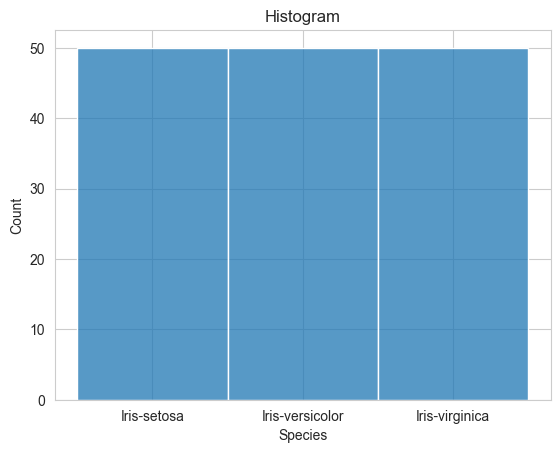

In [898]:
iris_df["Species"].value_counts()
ax = sns.histplot(data=iris_df, x="Species").set_title("Histogram")

<AxesSubplot: xlabel='Species', ylabel='SepalLengthCm'>

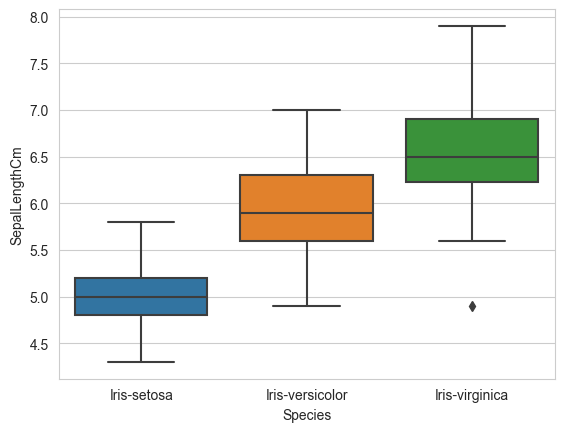

In [899]:
# 2 - outliers check
# sepal length
sns.boxplot(x="Species", y="SepalLengthCm", data=iris_df)

<AxesSubplot: xlabel='Species', ylabel='SepalWidthCm'>

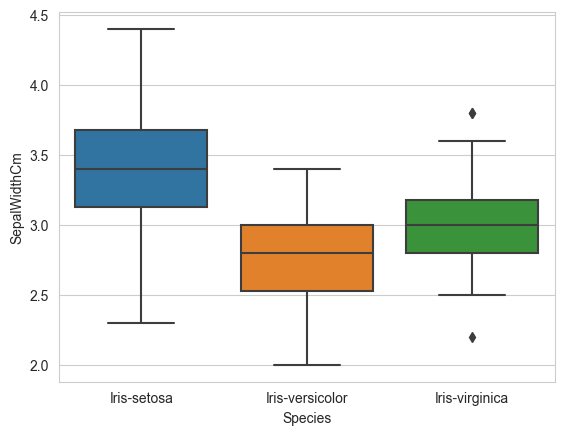

In [900]:
# sepal width
sns.boxplot(x="Species", y="SepalWidthCm", data=iris_df)

<AxesSubplot: xlabel='Species', ylabel='PetalWidthCm'>

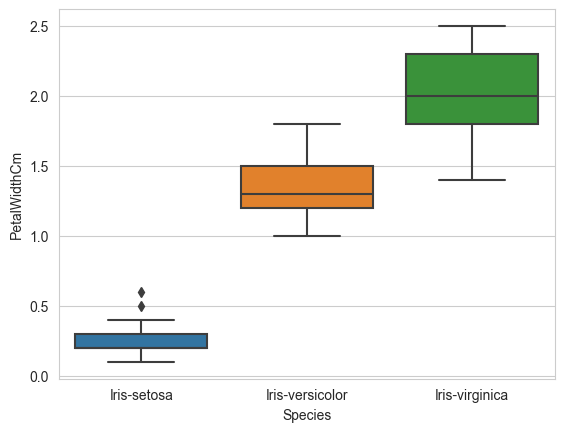

In [901]:
# petal width
sns.boxplot(x="Species", y="PetalWidthCm", data=iris_df)

<AxesSubplot: xlabel='Species', ylabel='PetalLengthCm'>

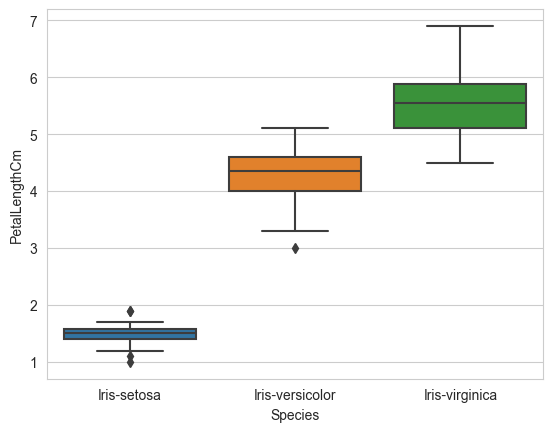

In [902]:
# petal length
sns.boxplot(x="Species", y="PetalLengthCm", data=iris_df)

<AxesSubplot: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

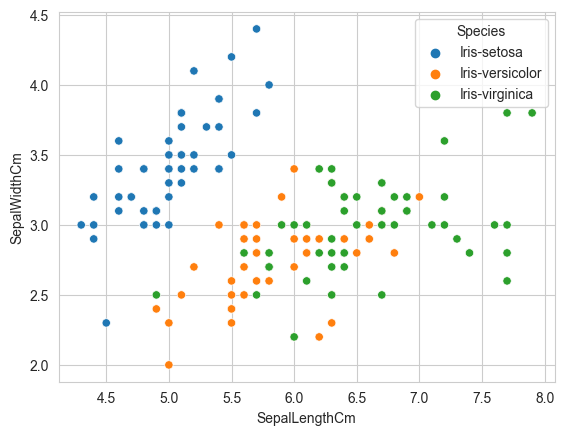

In [903]:
#scatterplot to study relation between sepal width and length
sns.scatterplot(data=iris_df, x="SepalLengthCm", y="SepalWidthCm", hue="Species")

<AxesSubplot: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

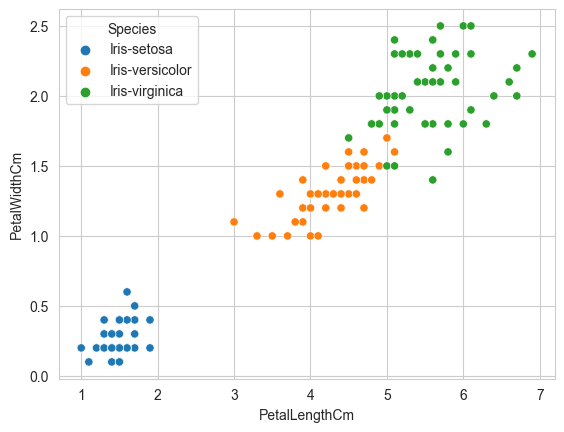

In [904]:
#scatterplot to study relation between petal width and length
sns.scatterplot(data=iris_df, x="PetalLengthCm", y="PetalWidthCm", hue="Species")

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

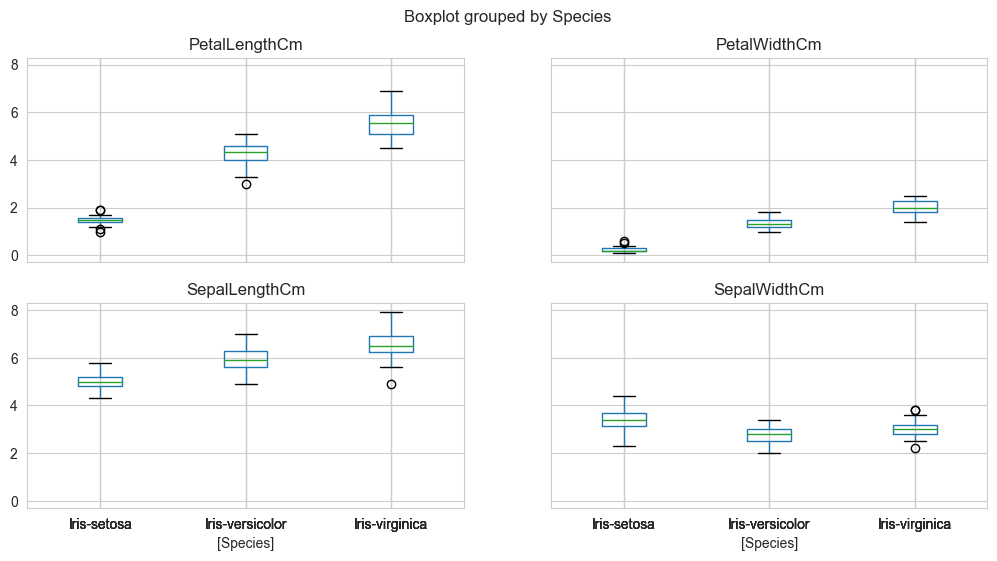

In [905]:
# outlier check using boxplot for petal,sepal width and lengths.
iris_df.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))
iris_df['Species']

In [906]:
#encoding categorical values to numerical using label encoder
iris_df['Species'] = LabelEncoder().fit_transform(iris_df['Species'])
c= np.asarray(iris_df['Species'])
iris_df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

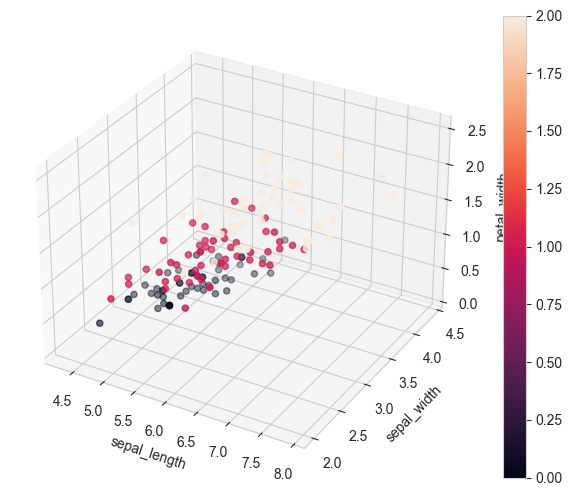

In [907]:
plt.figure(figsize=(8,6))
ax= plt.axes(projection='3d')
fg= ax.scatter3D(iris_df['SepalLengthCm'],iris_df['SepalWidthCm'],iris_df['PetalWidthCm'],c=iris_df['Species'])
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_width')
plt.colorbar(fg)

In [908]:
#split dataframe to train and test
X=iris_df.iloc[:,:4]
X.head()
Y=iris_df.iloc[:,-1]
Y.head()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=30)

[Text(0.5, 1.0, 'Accuracy Plot'),
 Text(0.5, 0, 'Nearest Neighbour'),
 Text(0, 0.5, 'Accuracy Metric')]

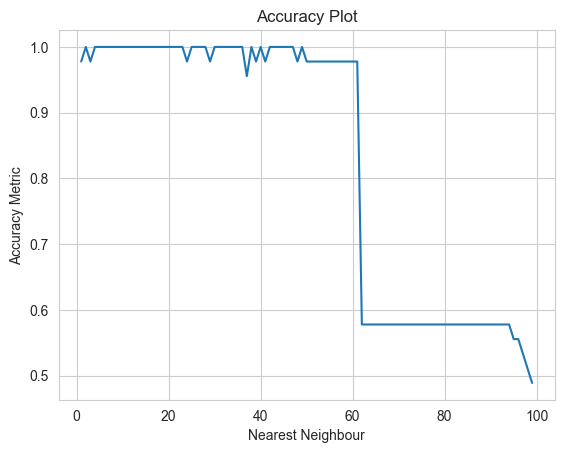

In [909]:

neighbors=np.arange(1,100)
accuracy_list=np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    knn.predict(X_test)
    accuracy_list[i]=knn.score(X_test,Y_test)


p1=figure(title='The influence of neighbors numbers on accuracy',
          x_axis_label='Number of neighbors',y_axis_label='Accuracy of KNN model')
p1.line(x=neighbors,y=accuracy_list)
p1.circle(x=neighbors,y=accuracy_list)

sns.lineplot(x=neighbors, y=accuracy_list).set(title='Accuracy Plot', xlabel='Nearest Neighbour', ylabel='Accuracy Metric')

In [910]:
k_range=list(range(1,20))
acc=[]
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test, Y_pred))
acc

[0.9777777777777777,
 1.0,
 0.9777777777777777,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [911]:
#model using best n = 3
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train)
y_pred = knn.predict(X_test)

In [912]:
# model accuracy
metrics.accuracy_score(Y_test,y_pred)

0.9777777777777777

In [913]:
#accuracy for species - predcition

se_count,se,v_count,vc_count,vce,ve = 0
y_test_val = Y_test.values
rangee=list(range(1,len(y_test_val)))
for i in rangee:
    if (y_test_val[i] == 0):
        se_count = se_count + 1
        if (y_test_val[i] == y_pred[i]):
            se = se + 1

    if y_test_val[i]==2:
        v_count = v_count + 1
        if y_test_val[i] == y_pred[i]:
            ve = ve + 1

    if y_test_val[i]==1:
        vc_count = vc_count + 1
        if y_test_val[i] == y_pred[i]:
            vce = vce + 1

In [914]:
print("accuracy of Iris-Setosa = ", (se/se_count)*100 )
print("accuracy of Iris-Versicolour = ", vce/vc_count*100 )
print("accuracy of Iris-Virginica = ", ve/v_count*100 )

accuracy of Iris-Setosa =  100.0
accuracy of Iris-Versicolour =  92.3076923076923
accuracy of Iris-Virginica =  100.0
